In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/drive/MyDrive/Kaggle/kaggle.json' '/content'

In [3]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [4]:
!kaggle datasets download -d aungpyaeap/supermarket-sales

  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 44.2MB/s]


In [5]:
zip_ref = zipfile.ZipFile('/content/supermarket-sales.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()

**About Dataset**


The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Attribute information**

*Invoice id:* Computer generated sales slip invoice identification number

*Branch:* Branch of supercenter (3 branches are available identified by A, B and C).

*City: *Location of supercenters

*Customer type:* Type of customers, recorded by Members for customers using member card and Normal for without member card.

*Gender:* Gender type of customer

*Product line:* General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

*Unit price: *Price of each product in $

*Quantity: *Number of products purchased by customer

*Tax: *5% tax fee for customer buying

*Total:* Total price including tax

*Date:* Date of purchase (Record available from January 2019 to March 2019)

*Time:* Purchase time (10am to 9pm)

*Payment:* Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

*COGS:* Cost of goods sold

*Gross margin percentage:* Gross margin percentage

*Gross income*: Gross income

*Rating:* Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [6]:
import pandas as pd
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


###Checking out our data:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

So we can see there are no null values here.

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


We'll first start by checking out how each customer is paying:

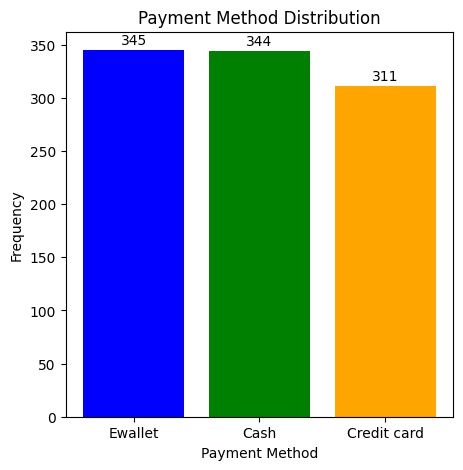

In [9]:
# Import the libraries
import matplotlib.pyplot as plt

# Count the frequency of each payment method
payment_counts = df["Payment"].value_counts()
bar_colors = ['Blue', 'green', 'orange']
# Create a bar graph
plt.figure(figsize=(5, 5))
plt.bar(payment_counts.index, payment_counts.values, color = bar_colors)
plt.xlabel("Payment Method")
plt.ylabel("Frequency")

plt.title("Payment Method Distribution")

# Add the values on the bars
for i, v in enumerate(payment_counts.values):
    plt.text(i, v + 5, str(v), ha="center")
plt.show()


So as we can see, mostly customers are paying via Ewallet and cash (with a slight difference between the two).

### Influence of other variables on Rating of store.

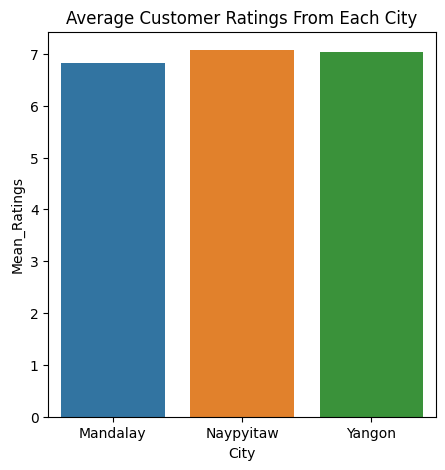

In [10]:
import seaborn as sns

# Group the data by city and calculate the mean rating for each city
city_rating = df.groupby("City")["Rating"].mean()

#Create Bar graph
plt.figure(figsize = (5,5))
ax = sns.barplot(x =city_rating.index, y = city_rating.values)
ax.set_xlabel("City")
ax.set_ylabel("Mean_Ratings")
ax.set_title("Average Customer Ratings From Each City")
plt.show()

It seems that customers in Naypyitaw city give the highest ratings to the store, followed by those in Yangon and Mandalay. So the store is doing something better in Naypyitaw which it should try to implement in stores in other cities.

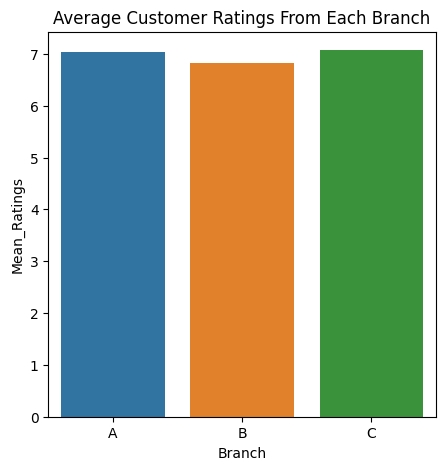

In [11]:
import seaborn as sns

# Group the data by city and calculate the mean rating for each city
branch_rating = df.groupby("Branch")["Rating"].mean()

#Create Bar graph
plt.figure(figsize = (5,5))
ax = sns.barplot(x =branch_rating .index, y = branch_rating .values)
ax.set_xlabel("Branch")
ax.set_ylabel("Mean_Ratings")
ax.set_title("Average Customer Ratings From Each Branch")
plt.show()

As we can see the average rating is highest for branch C and lowest for branch B. This implies that branch C is doing something better from other branches. The store can use this to make changes in branch B.

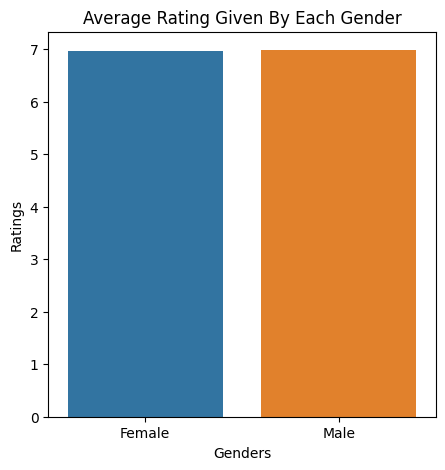

In [12]:
avg_gender_rating = df.groupby("Gender")['Rating'].mean()

#Make graph
plt.figure(figsize = (5,5))
ax = sns.barplot(x = avg_gender_rating.index, y = avg_gender_rating.values)
ax.set_xlabel("Genders")
ax.set_ylabel("Ratings")
ax.set_title("Average Rating Given By Each Gender")

plt.show()

It seems like both genders on an average give same ratings to the store.

###Busiest Time for purchases

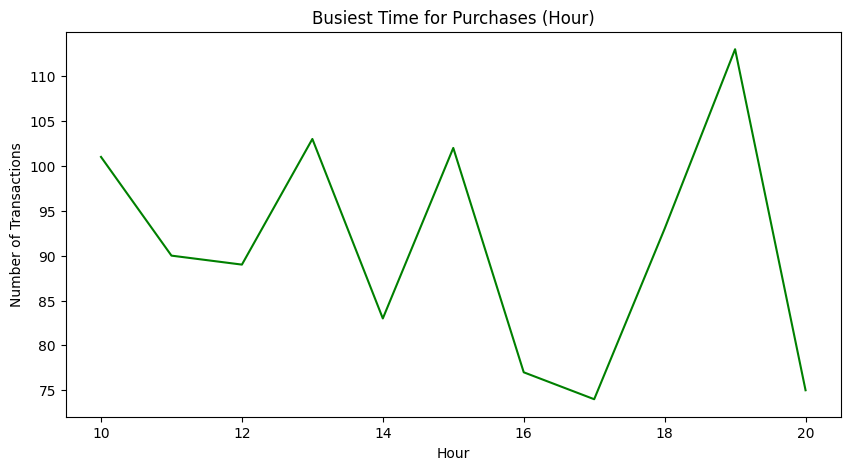

In [13]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt


# Extract the hour from the time column
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour

# Group the data by hour and count the number of transactions
hour_counts = df.groupby("Hour")["Invoice ID"].count()

# Create a line plot
plt.figure(figsize = (10,5))
plt.plot(hour_counts.index, hour_counts.values, color = 'green')
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.title("Busiest Time for Purchases (Hour)")
plt.show()


On the hourly basis the store is mostly busy at 7PM.

<ipython-input-15-972b103caaf2>:10: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  day_mean = df.groupby("Day")["Invoice ID"].count().mean(level=0)


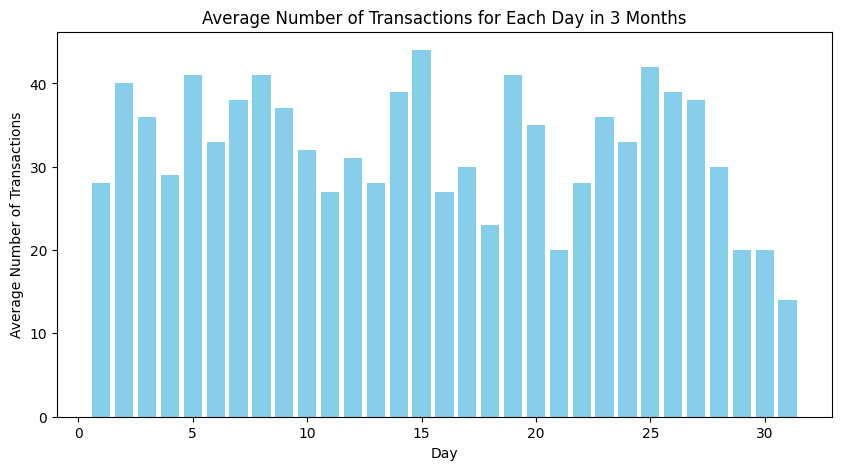

In [15]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt


# Extract the hour from the time column
df["Day"] = pd.to_datetime(df["Date"]).dt.day

# Group the data by day and calculate the mean number of transactions
day_mean = df.groupby("Day")["Invoice ID"].count().mean(level=0)

# Create a bar plot
plt.figure(figsize=(10,5))
plt.bar(day_mean.index, day_mean.values, color = ["skyblue"])
plt.xlabel("Day")
plt.ylabel("Average Number of Transactions")
plt.title("Average Number of Transactions for Each Day in 3 Months")
plt.show()


Most purchases were made on 15th of every month on an average.

 ### Product line bought the most:

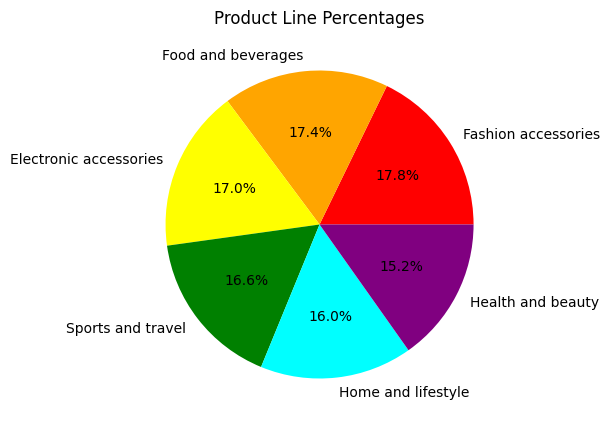

In [16]:
# Count the frequency of each product line
product_counts = df["Product line"].value_counts()

# Create a pie chart
plt.figure(figsize=(5,5))
# Define a list of colors
colors = ["red", "orange", "yellow", "green", "cyan", "purple"]
plt.pie(product_counts.values, labels=product_counts.index, colors = colors, autopct="%1.1f%%")
plt.title("Product Line Percentages")
plt.show()

The products that were bought the most belonged fashion accessories followed by food and beverages and so on...So mostly people spend on clothes,food and electronics.

### Income vs expenditure

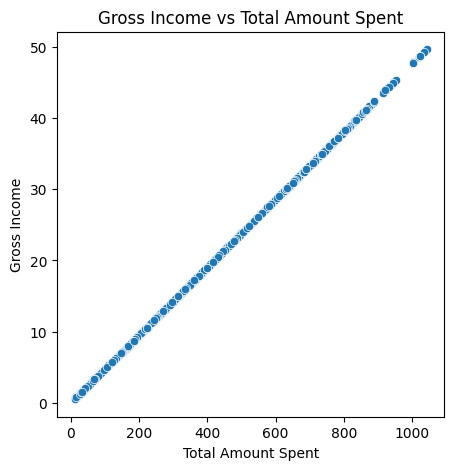

In [17]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x=df["Total"] , y=df['gross income'])
plt.xlabel("Total Amount Spent")
plt.ylabel("Gross Income")
plt.title("Gross Income vs Total Amount Spent")

plt.show()

This is cool...

There is a linear relationship between gross income of people and total expenditure that they are doing. As the income increase the amount spend on products also starts to increase in a linear way.

### Branches vs other variables

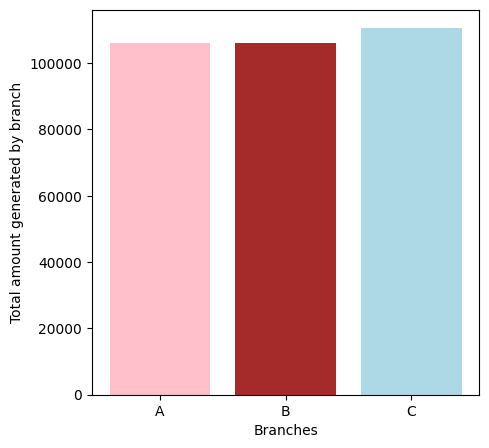

In [18]:
profitable_branch = df.groupby('Branch')['Total'].sum()

plt.figure(figsize = (5,5))
colors = ['pink', 'brown', 'lightblue']
plt.bar(profitable_branch.index, profitable_branch.values, color = colors)
plt.xlabel("Branches")
plt.ylabel("Total amount generated by branch")
plt.show()

It is clear from the graph that the branch C is generating more money than Branch A and B.

<ipython-input-19-0c9a2ff80234>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  profitable_day = df.groupby('Day')['Total'].sum().mean(level=0)


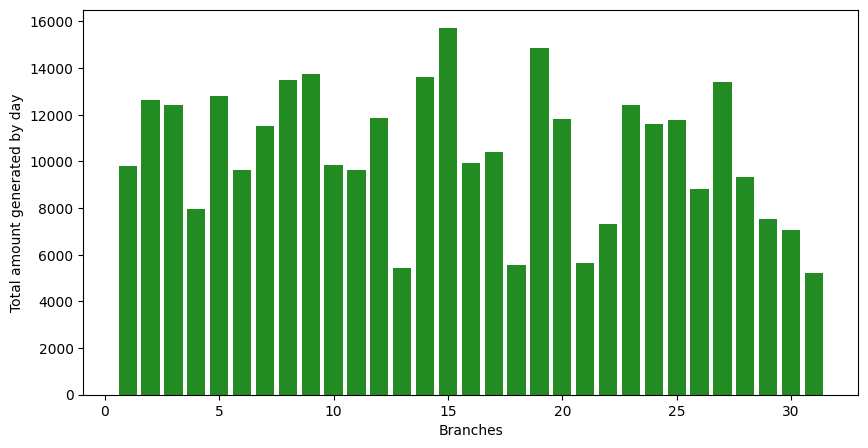

In [19]:
profitable_day = df.groupby('Day')['Total'].sum().mean(level=0)

plt.figure(figsize = (10,5))
plt.bar(profitable_day.index, profitable_day.values, color = ['forestgreen'])
plt.xlabel("Branches")
plt.ylabel("Total amount generated by day")
plt.show()

The graph shows that the highest amount is generated on the 15th of every month (on average). This is not surprising, because one of the above graphs shows that the maximum shopping occurs on the 15th. More shopping means more revenue

In [20]:
df['Month'] = pd.to_datetime(df["Date"]).dt.month

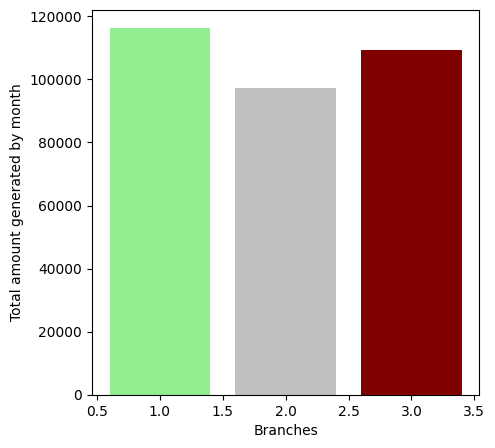

In [21]:

profitable_month = df.groupby('Month')['Total'].sum()

plt.figure(figsize = (5,5))
colors = ['lightgreen', 'silver', 'maroon']
plt.bar(profitable_month.index, profitable_month.values, color = colors)
plt.xlabel("Branches")
plt.ylabel("Total amount generated by month")
plt.show()

### Normal vs Member Customer

Finally we'd like to know how do store's member customer's compare to the normal customers


In [30]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

<ipython-input-33-0a4decf625b3>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  member_vs_normal = df.groupby('Customer type')['Total'].sum().mean(level = 0)


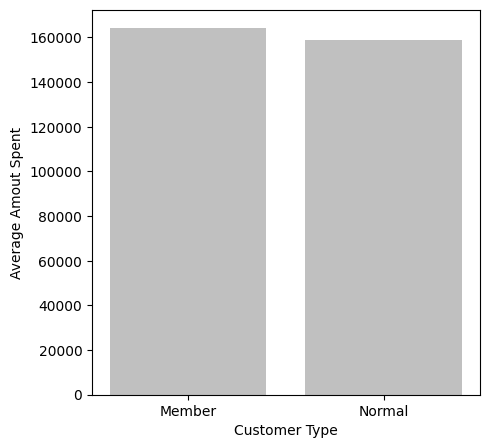

In [33]:
member_vs_normal = df.groupby('Customer type')['Total'].sum().mean(level = 0)

plt.figure(figsize = (5,5))
plt.bar(member_vs_normal.index , member_vs_normal.values, color = 'silver')
plt.xlabel("Customer Type")
plt.ylabel("Average Amout Spent")
plt.show()

So as we can see that on an average a member customer spends more on goods than a normal customer. This can be used to like give discounts to the members as they spend more.